In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
file_path = 'Downloads/user_behavior_dataset.csv'  
data = pd.read_csv(file_path)

In [2]:
# Displaying the first few rows 
print("First few rows of the dataset:")
display(data.head())

#DATA CLEANING SECTION

#missing values
print("\nDataset Info:")
data.info()

# Display distributions
print("\nBasic Statistics:")
display(data.describe())

First few rows of the dataset:


,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB

Basic Statistics:


,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.00000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.50000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.21688,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.00000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.75000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.50000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.25000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.00000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


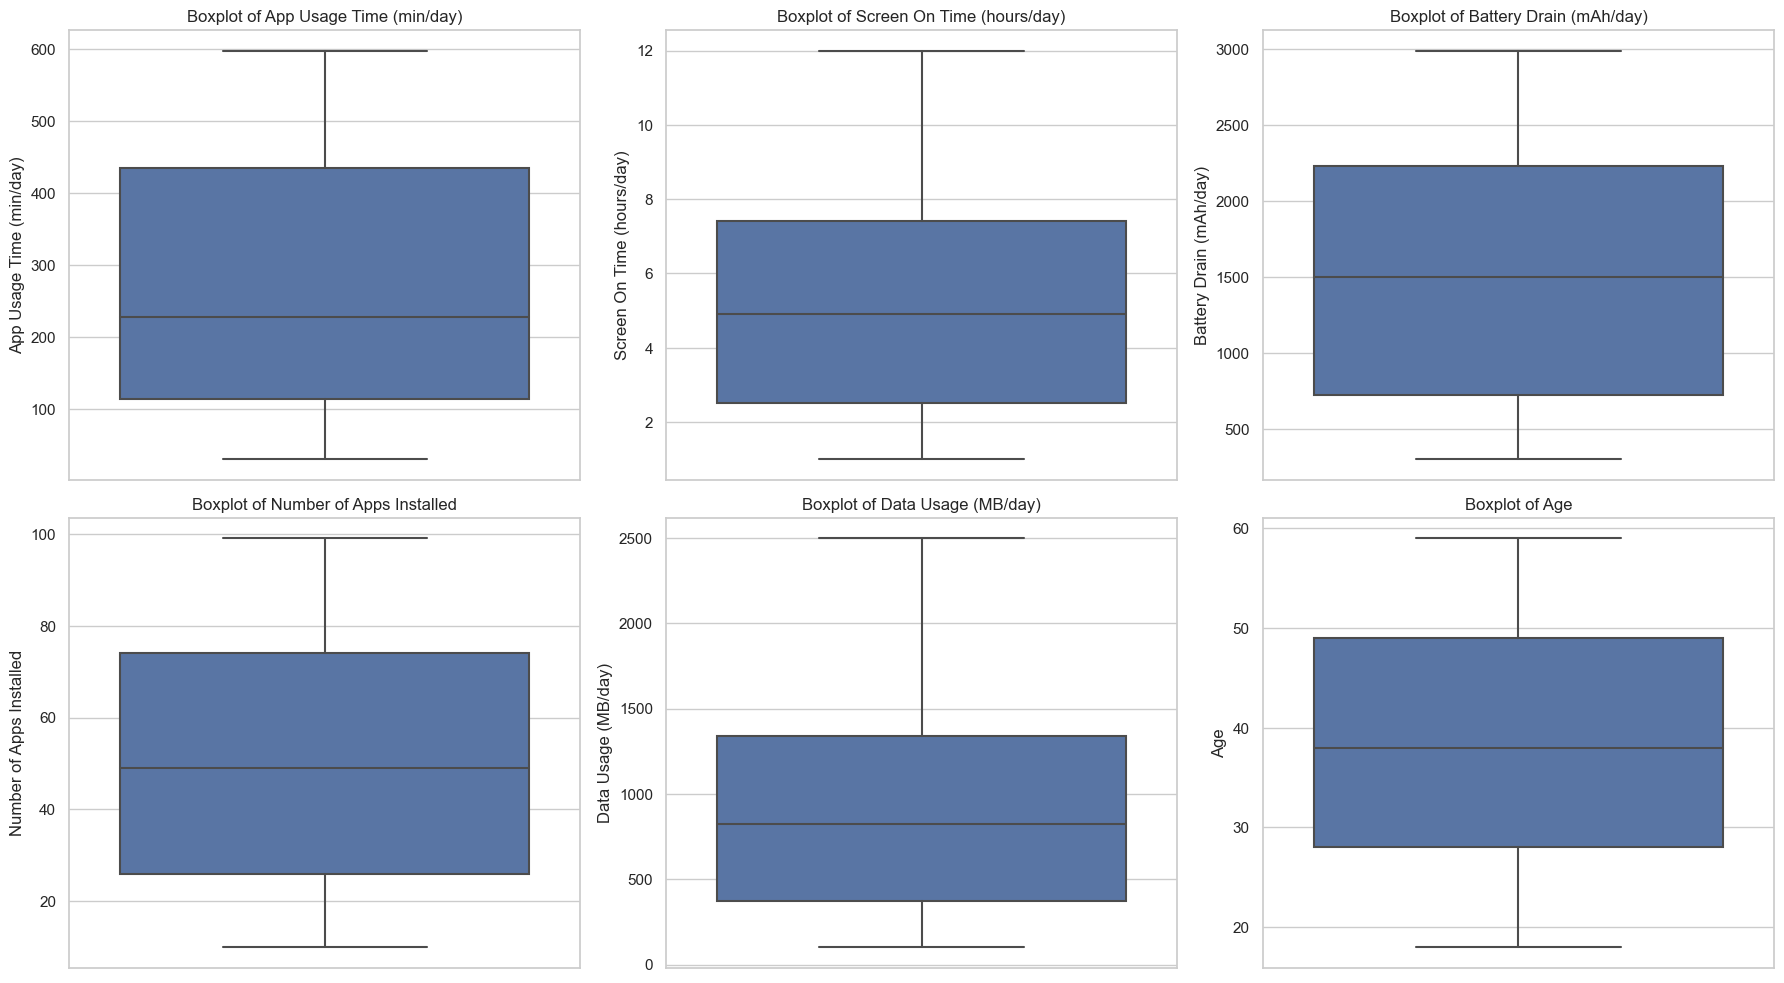

In [3]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

columns_to_check = [
    'App Usage Time (min/day)', 'Screen On Time (hours/day)', 
    'Battery Drain (mAh/day)', 'Number of Apps Installed', 
    'Data Usage (MB/day)', 'Age'
]

for i, col in enumerate(columns_to_check):
    sns.boxplot(data=data, y=col, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

No data cleaning was necessary as the outliers are rare and everything seems to be in order.

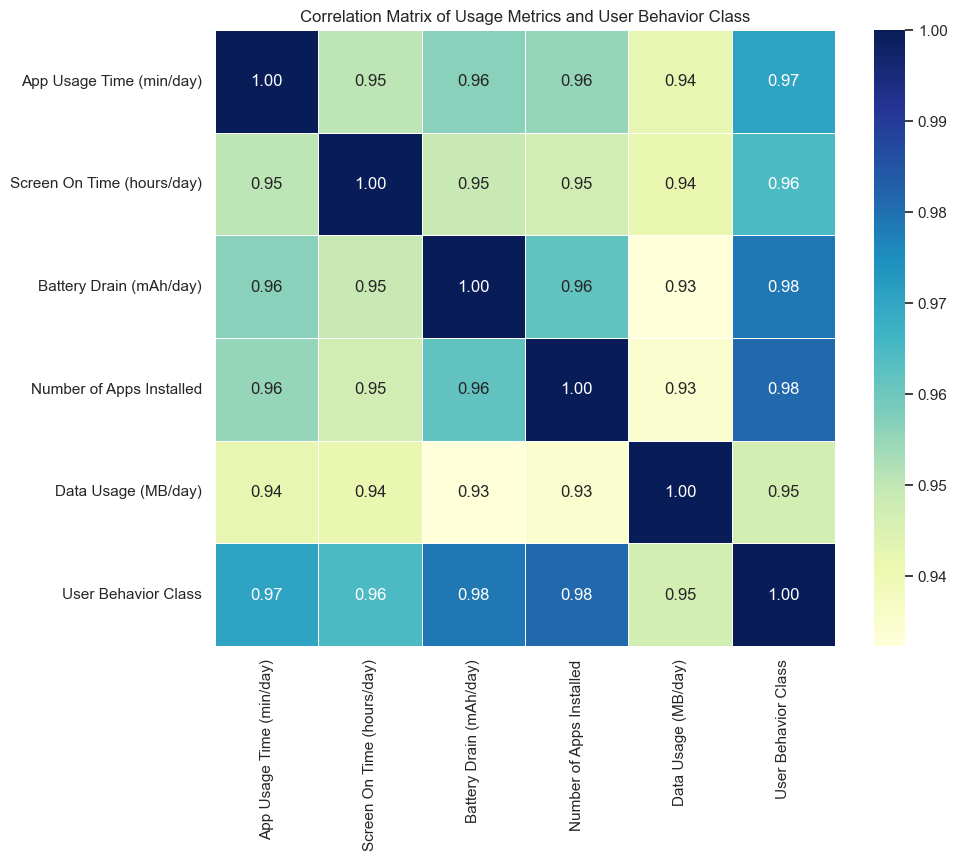

In [4]:
correlation_data = data[['App Usage Time (min/day)', 'Screen On Time (hours/day)', 
                         'Battery Drain (mAh/day)', 'Number of Apps Installed', 
                         'Data Usage (MB/day)', 'User Behavior Class']]

correlation_matrix = correlation_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Usage Metrics and User Behavior Class")
plt.show()

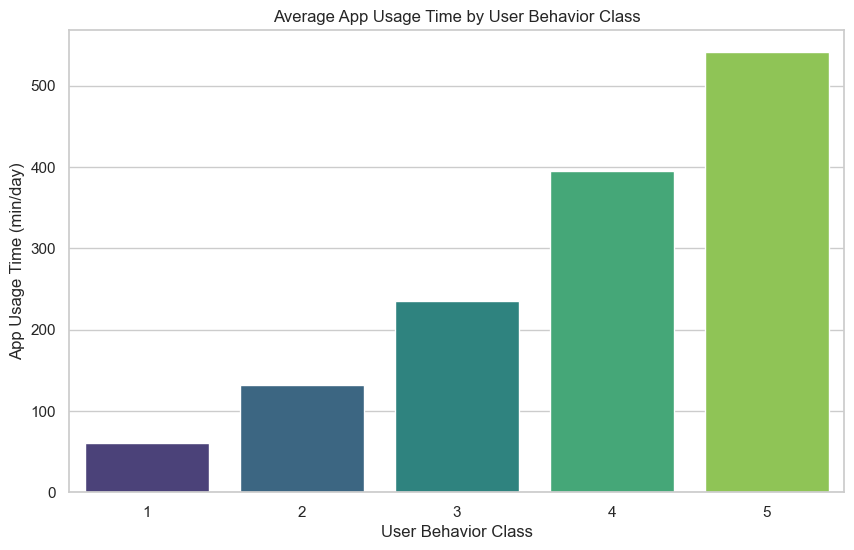

In [5]:
# Calculate the average app usage time for each behavior class
avg_app_usage_by_class = data.groupby('User Behavior Class')['App Usage Time (min/day)'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_app_usage_by_class, x='User Behavior Class', y='App Usage Time (min/day)', palette="viridis")
plt.title("Average App Usage Time by User Behavior Class")
plt.xlabel("User Behavior Class")
plt.ylabel("App Usage Time (min/day)")
plt.show()

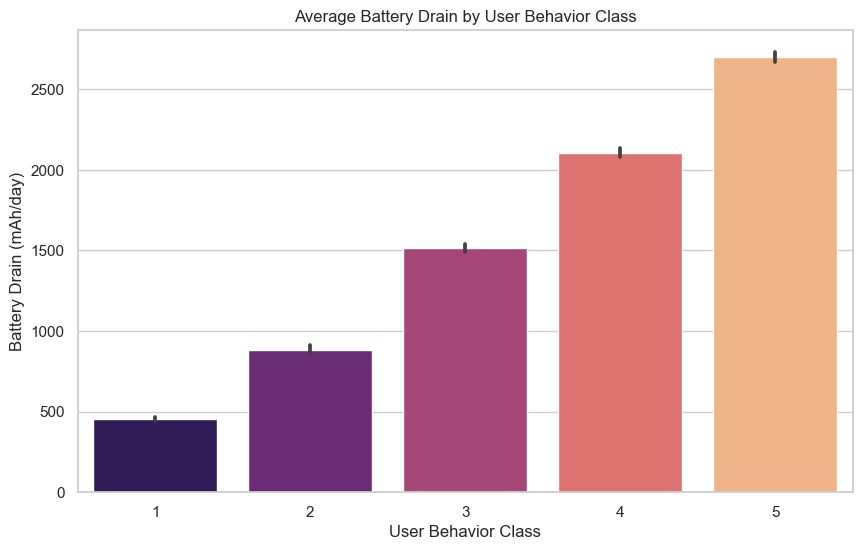

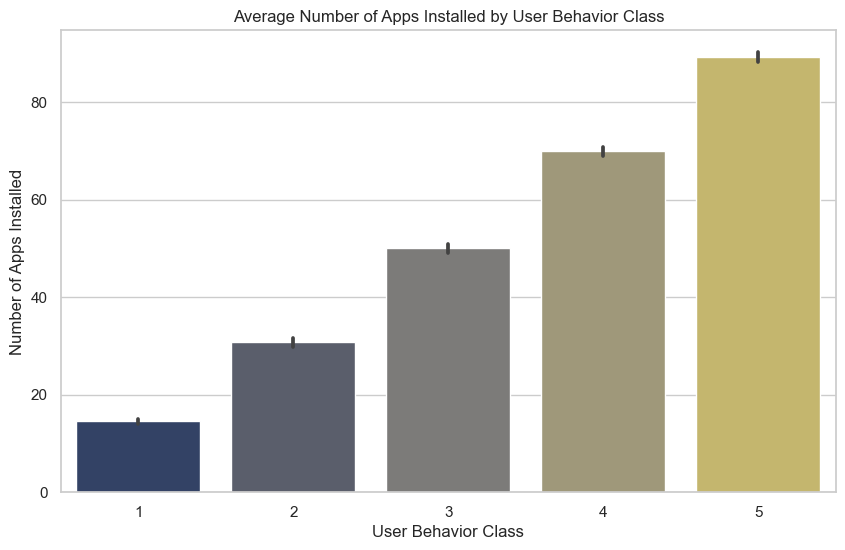

In [6]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='User Behavior Class', y='Battery Drain (mAh/day)', palette="magma")
plt.title("Average Battery Drain by User Behavior Class")
plt.xlabel("User Behavior Class")
plt.ylabel("Battery Drain (mAh/day)")
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='User Behavior Class', y='Number of Apps Installed', palette="cividis")
plt.title("Average Number of Apps Installed by User Behavior Class")
plt.xlabel("User Behavior Class")
plt.ylabel("Number of Apps Installed")
plt.show()

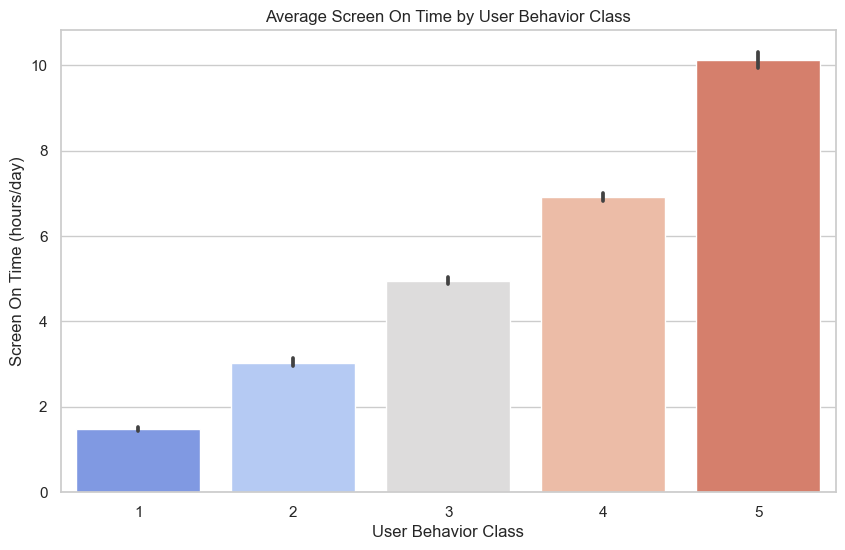

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='User Behavior Class', y='Screen On Time (hours/day)', palette="coolwarm")
plt.title("Average Screen On Time by User Behavior Class")
plt.xlabel("User Behavior Class")
plt.ylabel("Screen On Time (hours/day)")
plt.show()

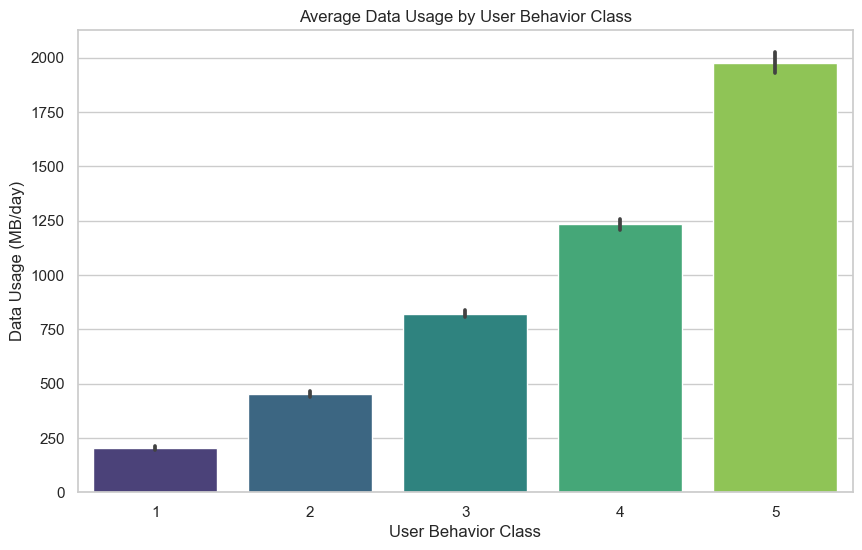

In [8]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='User Behavior Class', y='Data Usage (MB/day)', palette="viridis")
plt.title("Average Data Usage by User Behavior Class")
plt.xlabel("User Behavior Class")
plt.ylabel("Data Usage (MB/day)")
plt.show()

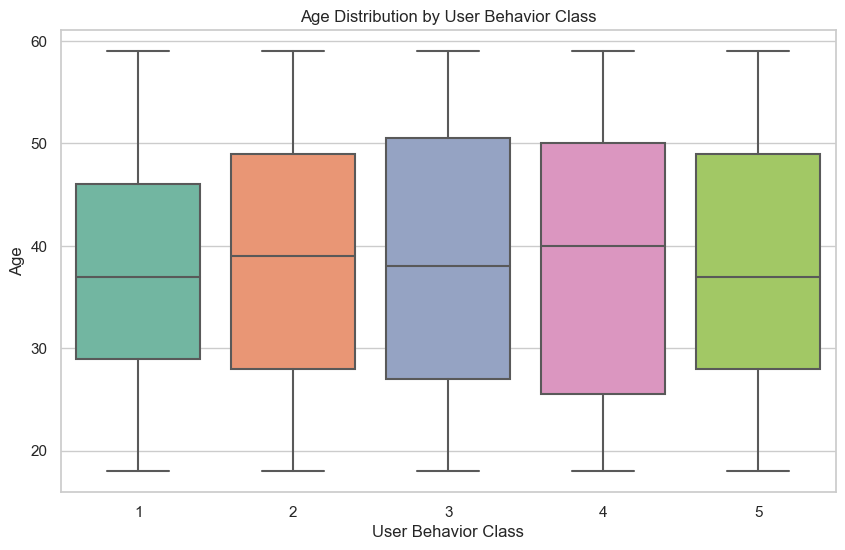

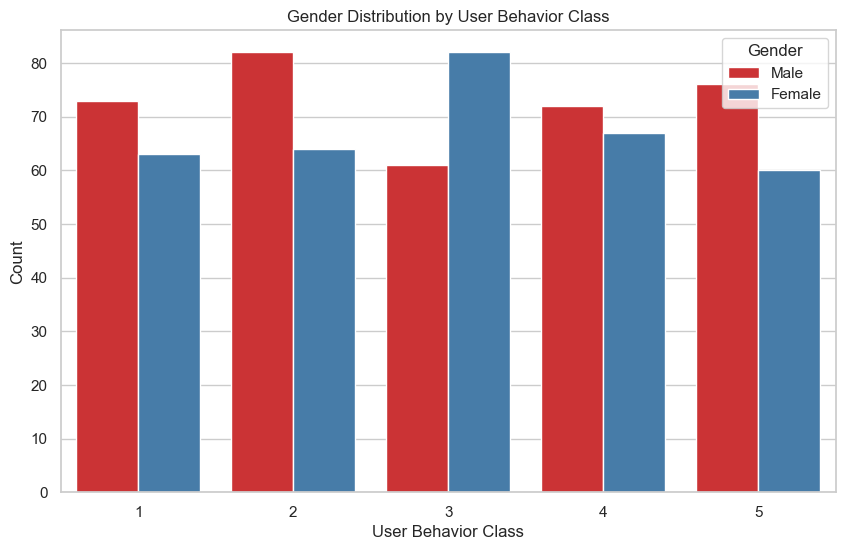

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='User Behavior Class', y='Age', palette="Set2")
plt.title("Age Distribution by User Behavior Class")
plt.xlabel("User Behavior Class")
plt.ylabel("Age")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='User Behavior Class', hue='Gender', palette="Set1")
plt.title("Gender Distribution by User Behavior Class")
plt.xlabel("User Behavior Class")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()